<a href="https://colab.research.google.com/github/JR-cuh/mis-515/blob/main/kaggleproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reading Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = ['/2019-property-sales-data.csv']

data = pd.read_csv('/2019-property-sales-data.csv')


print(data)


      PropertyID       PropType        taxkey            Address  \
0        98422.0  Manufacturing  1.001100e+07    9400 N 124TH ST   
1        98453.0     Commercial  3.002311e+07  10545 W DONGES CT   
2        98490.0    Residential  4.006100e+07  9409 N MICHAEL CT   
3        98495.0    Residential  4.006600e+07  9469 N MICHAEL CT   
4        98545.0    Residential  5.002600e+07    9313 N JOYCE AV   
...          ...            ...           ...                ...   
6206    260642.0    Condominium  7.160339e+09    1912 W SALEM ST   
6207    260656.0    Condominium  7.160353e+09     6310 S 20TH ST   
6208    260659.0    Condominium  7.160356e+09     6308 S 20TH ST   
6209    260683.0    Condominium  7.160380e+09     6332 S 20TH ST   
6210         NaN            NaN           NaN                NaN   

         CondoProject  District    nbhd                         Style  \
0                 NaN       9.0  6300.0                 Pole Building   
1                 NaN       9.0  6202

In [ ]:
df = pd.read_csv('/2019-property-sales-data.csv')

print(df.head())
print(df.info())

   PropertyID       PropType      taxkey            Address CondoProject  \
0     98422.0  Manufacturing  10011000.0    9400 N 124TH ST          NaN   
1     98453.0     Commercial  30023110.0  10545 W DONGES CT          NaN   
2     98490.0    Residential  40061000.0  9409 N MICHAEL CT          NaN   
3     98495.0    Residential  40066000.0  9469 N MICHAEL CT          NaN   
4     98545.0    Residential  50026000.0    9313 N JOYCE AV          NaN   

   District    nbhd                         Style                  Extwall  \
0       9.0  6300.0                 Pole Building             Metal Siding   
1       9.0  6202.0  Warehouse Building - 1 Story           Concrete Block   
2       9.0    40.0                         Ranch  Fiber Cement/Hardiplank   
3       9.0    40.0                         Tudor  Fiber Cement/Hardiplank   
4       9.0    40.0                         Ranch           Aluminum/Vinyl   

   Stories  Year_Built  Rooms  FinishedSqft  Units  Bdrms  Fbath  Hbath  \

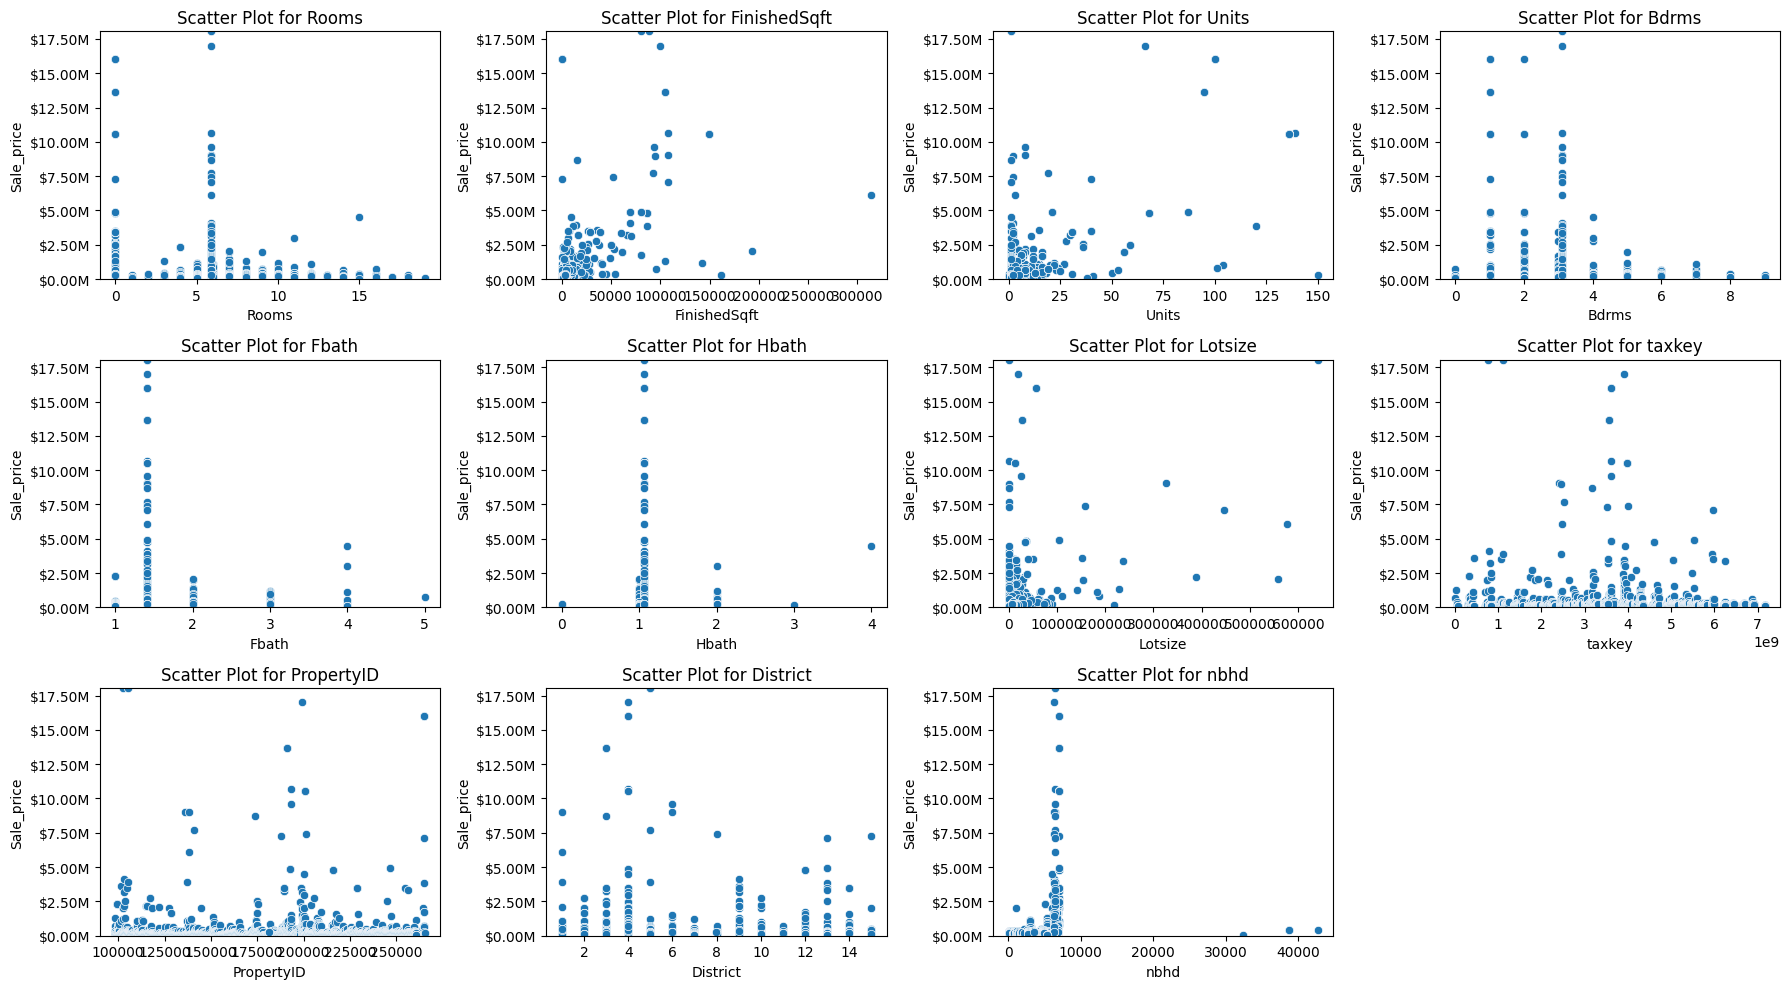

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Set dataframe
selected_features = ['Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'taxkey', 'PropertyID', 'District', 'nbhd', 'Sale_price']

# Filter the DataFrame
selected_data = data[selected_features]

# Get the highest sales price in the dataset
max_sale_price = selected_data['Sale_price'].max()

# Set the size of the plot
plt.figure(figsize=(18, 10))

# Create individual scatter plots for each feature
for i, feature in enumerate(selected_data.columns[:-1]):  # Exclude 'Sale_price'
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=feature, y='Sale_price', data=selected_data)

    # Set y-axis limits from 0 to the highest sales price
    plt.ylim(0, max_sale_price)

    # Format y-axis labels to display in millions
    formatter = FuncFormatter(lambda x, _: f'${x/1e6:.2f}M')
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.title(f'Scatter Plot for {feature}')

plt.tight_layout()
plt.show()

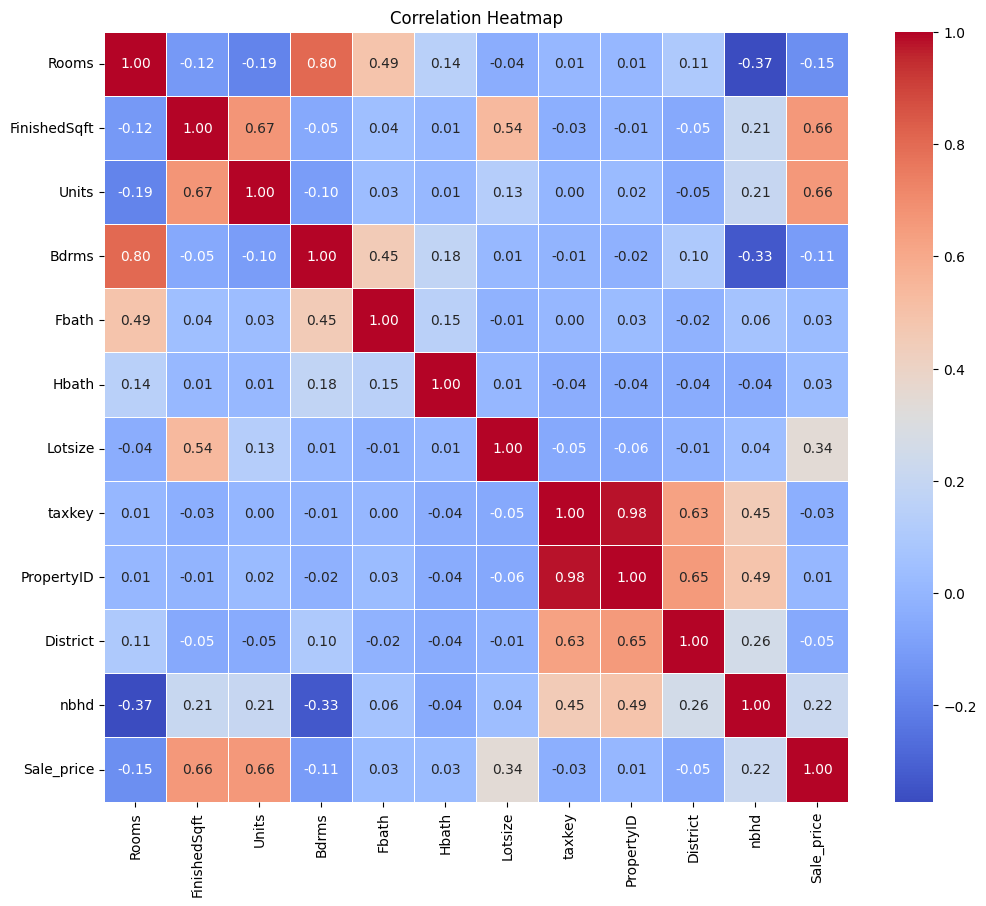

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set dataframe
selected_features = ['Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'taxkey', 'PropertyID', 'District', 'nbhd', 'Sale_price']

# Filter the DataFrame
selected_data = data[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

Mean Absolute Error: 81220.64060394646


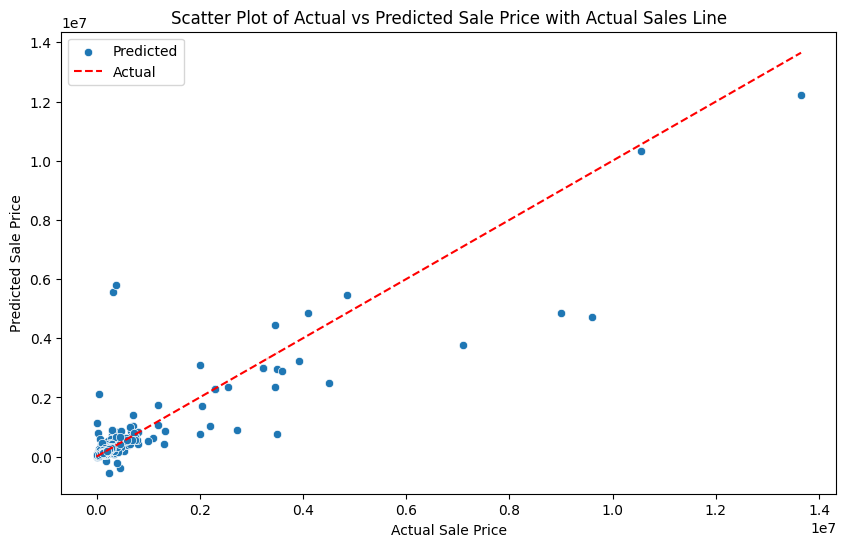

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the property sales data for 2019.
data = pd.read_csv('/2019-property-sales-data.csv')

# Handling missing values
# Fill in missing values for numerical columns with column-wise mean
numerical_cols = ['Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'taxkey', 'PropertyID', 'District', 'nbhd', 'Sale_price']
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

# Filling missing values for categorical columns with column-wise mode
categorical_cols = ['Address', 'CondoProject', 'PropType', 'Style', 'Extwall', 'Sale_date']
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]), axis=0)

# Handling missing values in the target variable
y_imputer = SimpleImputer(strategy='mean')
y_imputed = y_imputer.fit_transform(data['Sale_price'].values.reshape(-1, 1))
data['Sale_price'] = y_imputed.ravel()


# One-hot encode categorical columns for better understanding.
data = pd.get_dummies(data, columns=categorical_cols)

# Using HistGradientBoostingRegressor
X = data.drop('Sale_price', axis=1)
y = data['Sale_price']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating mean absolute error to evaluate the model
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Create a scatter plot to see how close our predictions are to actual values.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Scatter Plot of Actual vs Predicted Sale Price with Actual Sales Line')
plt.legend()
plt.show()